In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
!unrar x "./emg.zip" "./"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from ./emg.zip


Would you like to replace the existing file ./EMG Physical Action Data Set/readme.txt
  4174 bytes, modified on 2011-07-28 01:26
with a new one
  4174 bytes, modified on 2011-07-28 01:26

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
! sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.8.0-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
!tree './EMG Physical Action Data Set/sub1'

./EMG Physical Action Data Set/sub1
├── Aggressive
│   ├── log
│   │   ├── Elbowing.log
│   │   ├── FrontKicking.log
│   │   ├── Hamering.log
│   │   ├── Headering.log
│   │   ├── Kneeing.log
│   │   ├── Pulling.log
│   │   ├── Punching.log
│   │   ├── Pushing.log
│   │   ├── SideKicking.log
│   │   └── Slapping.log
│   └── txt
│       ├── Elbowing.txt
│       ├── Frontkicking.txt
│       ├── Hamering.txt
│       ├── Headering.txt
│       ├── Kneeing.txt
│       ├── Pulling.txt
│       ├── Punching.txt
│       ├── Pushing.txt
│       ├── Sidekicking.txt
│       └── Slapping.txt
└── Normal
    ├── log
    │   ├── Bowing.log
    │   ├── Clapping.log
    │   ├── Handshaking.log
    │   ├── Hugging.log
    │   ├── Jumping.log
    │   ├── Running.log
    │   ├── Seating.log
    │   ├── Standing.log
    │   ├── Walking.log
    │   └── Waving.log
    └── txt
        ├── Bowing.txt
        ├── Clapping.txt
        ├── Handshaking.txt
        ├── Hugging.txt
        ├── Jumping.txt
        ├── 

In [ ]:
!cat ./ EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/Slapping.txt


cat: ./: Is a directory
2	113	129	55	-1042	845	-94	-2474
-226	36	126	15	-1577	498	-373	-1531
-1205	34	-20	67	-2509	83	-572	-674
-1105	70	-92	95	-3444	-240	-709	-407
-517	17	-173	61	-3855	-589	-846	-805
-1951	-218	-146	69	-4000	-790	-1124	-1465
-4000	-608	-100	22	-4000	-875	-1337	-1595
-4000	-735	-83	2	-4000	-224	-1397	-936
-4000	-591	-76	62	-4000	169	-1684	-508
-4000	-552	-29	85	-4000	167	-1909	-446
-1948	-509	-54	131	-4000	135	-1833	-274
1605	-383	-156	142	-4000	57	-1547	128
4000	-306	-188	130	-4000	303	-1458	395
4000	-323	-239	128	-4000	283	-1592	442
4000	-310	-279	116	-4000	-123	-1702	632
4000	40	-311	128	-4000	-393	-1641	1193
4000	250	-253	64	-4000	-271	-1570	1663
1147	-188	-179	10	-3508	-238	-1547	1765
835	-399	-114	-23	-2805	-101	-1655	1643
-484	-11	-66	-95	-2550	201	-1944	1395
-600	485	-15	-139	-2286	227	-2174	1141
188	1041	18	-195	-1971	309	-2549	864
-283	1358	-46	-212	-918	295	-2792	621
538	1516	-127	-271	-287	260	-2893	238
1637	1482	-95	-324	264	249	-2756	426
2156	1051	85	-30

In [ ]:
import os
i=1
ind=0
actions = {}
datadir=['./EMG Physical Action Data Set/sub1/Aggressive/txt','./EMG Physical Action Data Set/sub1/Normal/txt']
df=pd.DataFrame()
for dir in datadir:
  for files in os.listdir(dir):
    with open(os.path.join(dir,files),'r') as f:
      temp=pd.read_csv(f.name,sep='\t',
                       header=None,
                       names=['f'+str(i) for i in range(1,9)])
      #sanity check
      if i==1:
        print(temp)
        i+=1
      temp_chunked=pd.DataFrame()
      for i in range(0,len(temp),10):
        temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
        #temp_chunked=pd.concat([temp_chunked,temp.iloc[i:i+10].max()],ignore_index=True)
      labels=[files[:-4] for i in range(len(temp_chunked))]
      temp_chunked['Action']=labels
      actions[files[:-4]]=ind
      df=pd.concat([df,temp_chunked],axis=0)
      ind+=1
print(actions)

        f1   f2    f3   f4    f5    f6    f7    f8
0      139 -310 -4000 -114  1824 -1171 -4000  1533
1      798 -203 -4000 -318  3013 -1010 -4000  1597
2     1616  -78 -4000 -514  2813  -945 -4000  1598
3     1832  -66 -3935 -695   253  -912 -4000  1598
4     3514 -116 -2737 -724  -215  -875 -4000  1598
...    ...  ...   ...  ...   ...   ...   ...   ...
9632  2524  618  -237 -130  3359  4000  2387   695
9633  1430  552  -348 -198  4000  4000  2321   800
9634   577  540  -252 -173  4000  4000  2517   898
9635   119  521   -43 -125  4000  4000  2749   955
9636  -191  328   -62 -146  4000  4000  3168   955

[9637 rows x 8 columns]


Streaming output truncated to the last 5000 lines.
<ipython-input-40-6a71305917f2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
<ipython-input-40-6a71305917f2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
<ipython-input-40-6a71305917f2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
<ipython-input-40-6a71305917f2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_chunked = temp_ch

{'Punching': 0, 'Pulling': 1, 'Hamering': 2, 'Kneeing': 3, 'Sidekicking': 4, 'Slapping': 5, 'Frontkicking': 6, 'Pushing': 7, 'Headering': 8, 'Elbowing': 9, 'Bowing': 10, 'Walking': 11, 'Waving': 12, 'Running': 13, 'Handshaking': 14, 'Jumping': 15, 'Clapping': 16, 'Hugging': 17, 'Seating': 18, 'Standing': 19}


<ipython-input-40-6a71305917f2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
<ipython-input-40-6a71305917f2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
<ipython-input-40-6a71305917f2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
<ipython-input-40-6a71305917f2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index 

In [ ]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,Action
0,4000,-40,4000,-114,4000,-802,-4000,1598,Punching
1,2328,-16,4000,472,-429,-991,1650,1417,Punching
2,4000,107,1436,386,-3653,-659,3268,1598,Punching
3,4000,224,882,142,4000,2,4000,1138,Punching
4,746,152,1747,105,4000,290,3475,221,Punching


In [ ]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8
count,19711.000000,19711.000000,19711.000000,19711.000000,19711.000000,19711.000000,19711.000000,19711.000000
mean,587.406727,378.445589,796.912485,452.761554,952.925930,769.658566,856.034955,625.848968
std,1046.129463,742.952489,1281.892521,905.693288,2281.512949,1796.110658,2128.127965,1707.168412
min,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000
25%,23.000000,36.000000,20.000000,12.000000,25.000000,39.000000,23.000000,22.000000
50%,168.000000,125.000000,185.000000,114.000000,188.000000,185.000000,158.000000,172.000000
75%,660.000000,392.000000,1088.500000,494.000000,3554.000000,1539.000000,2570.000000,1142.000000
max,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19711 entries, 0 to 972
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      19711 non-null  int64 
 1   f2      19711 non-null  int64 
 2   f3      19711 non-null  int64 
 3   f4      19711 non-null  int64 
 4   f5      19711 non-null  int64 
 5   f6      19711 non-null  int64 
 6   f7      19711 non-null  int64 
 7   f8      19711 non-null  int64 
 8   Action  19711 non-null  object
dtypes: int64(8), object(1)
memory usage: 1.5+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Action']=le.fit_transform(df['Action'])

In [ ]:
df['Action'].value_counts()

8     1000
4     1000
9     1000
14    1000
6     1000
18    1000
19    1000
1     1000
13     997
0      983
15     983
3      982
16     979
2      978
7      976
17     973
12     968
10     966
11     964
5      962
Name: Action, dtype: int64

In [ ]:
X=df.drop('Action',axis=1)
Y=df['Action']

In [ ]:
X=abs(X)
X=X.ewm(10).mean()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=34,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'max_depth':range(2,30,2)}
n_folds=4
dtree=DecisionTreeClassifier(random_state=69)
model_cv=GridSearchCV(dtree,param_grid=params,scoring='accuracy',return_train_score=True,verbose=1,cv=n_folds,n_jobs=-1)
model_cv.fit(X_train,Y_train)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=69), n_jobs=-1,
             param_grid={'max_depth': range(2, 30, 2)}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [ ]:
result=pd.DataFrame(model_cv.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.048627,0.005746,0.003337,0.000333,2,{'max_depth': 2},0.201674,0.202182,0.201928,0.199137,0.201230,0.001222,14,0.201251,0.200998,0.200998,0.202351,0.201399,0.000559
1,0.083763,0.004566,0.003178,0.000136,4,{'max_depth': 4},0.430999,0.478691,0.435312,0.472349,0.454338,0.021355,13,0.435143,0.477676,0.435819,0.480890,0.457382,0.021932
2,0.115581,0.006140,0.003367,0.000098,6,{'max_depth': 6},0.657281,0.664130,0.660578,0.647894,0.657471,0.006036,12,0.664214,0.661509,0.665483,0.661762,0.663242,0.001670
3,0.143361,0.004583,0.003475,0.000192,8,{'max_depth': 8},0.749112,0.744292,0.750888,0.738204,0.745624,0.004917,11,0.759597,0.756131,0.761289,0.764925,0.760485,0.003166
4,0.155237,0.006458,0.003546,0.000339,10,{'max_depth': 10},0.817098,0.820396,0.810249,0.807204,0.813737,0.005255,10,0.838661,0.837477,0.839337,0.842973,0.839612,0.002052


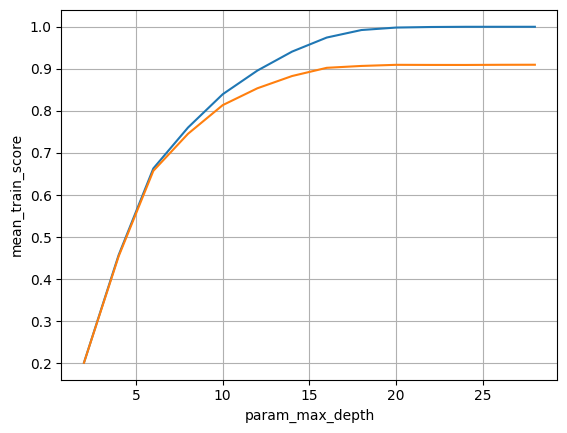

In [ ]:
sns.lineplot(x=result['param_max_depth'],y=result['mean_train_score'])
sns.lineplot(x=result['param_max_depth'],y=result['mean_test_score'])
plt.grid()

In [ ]:
params={'max_depth':[5,10,15,20,30,40,100,200],
        'min_samples_split':[2,25,50,75],
        'min_samples_leaf':[2,25]}
dt=DecisionTreeClassifier()
model_cv=GridSearchCV(dt,param_grid=params,scoring='accuracy',n_jobs=-1,cv=3,verbose=1,return_train_score=True)
model_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30, 40, 100, 200],
                         'min_samples_leaf': [2, 25],
                         'min_samples_split': [2, 25, 50, 75]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
model_cv.best_score_

0.8943429731100965

In [ ]:
model_cv.best_params_

{'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2}

HyperTuned Decision Tree gives 89% on cv and 92 on test

In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,Y_test)

0.92772001014456

In [ ]:
model=DecisionTreeClassifier(max_depth=20,min_samples_leaf=2,min_samples_split=2)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2)

In [ ]:
model.score(X_test,Y_test)

0.921126046157748

normal decision tree with default param gives 92

In [ ]:
# Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, title):

  train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,
                                                                        X,
                                                                        Y,
                                                                        return_times=True
                                                                        )

  fig, axes = plt.subplots(1, 1, figsize = (10, 5))

  axes.set_title(title)
  axes.plot
  axes.set_xlabel("Training examples")
  axes.set_ylabel("Score")


  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Plot learning curve
  axes.grid()
  axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
  )
  axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
  )
  axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
  )
  axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
  )
  axes.legend(loc="best")

  plt.show()

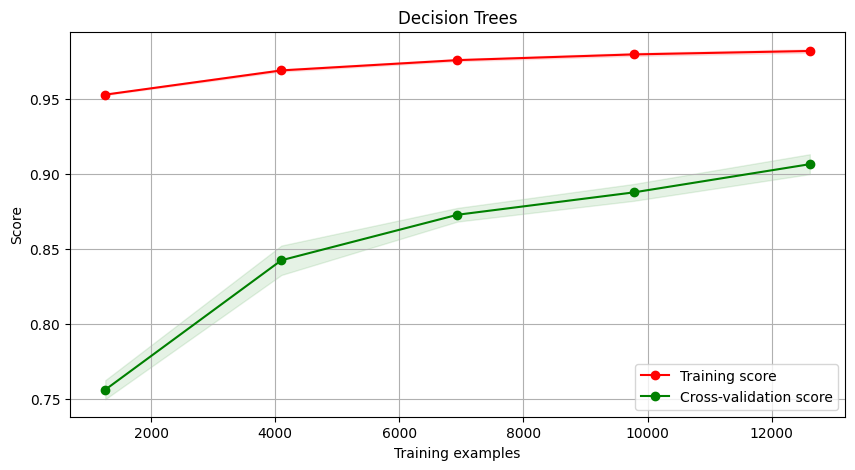

0.9855403348554034


In [ ]:
model1 = model_cv.best_estimator_

model1.fit(X_train, Y_train)

plot_learning_curve(model1, X_train, Y_train, "Decision Trees")

print(model1.score(X_train, Y_train))

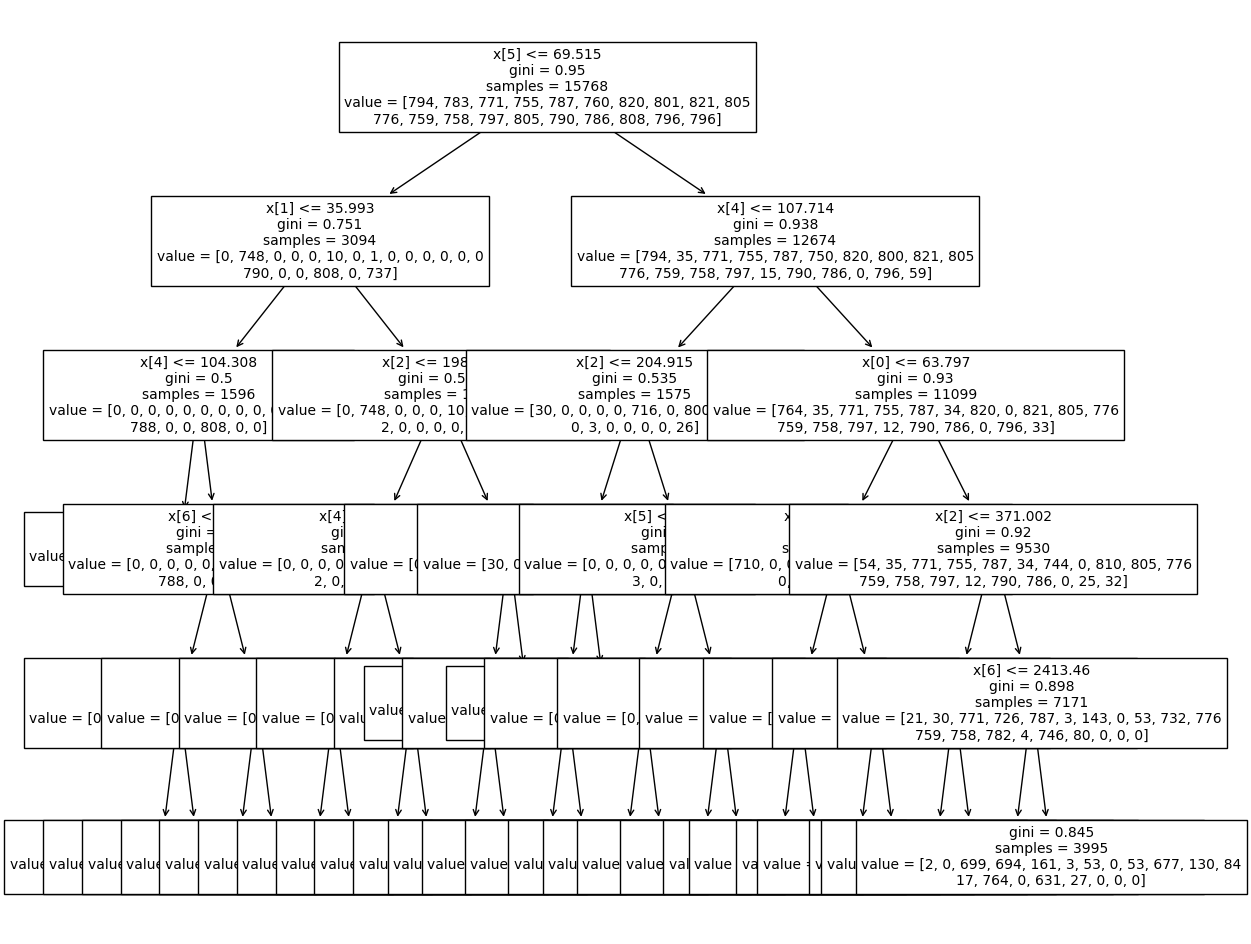

In [ ]:
# plot the decision tree
from sklearn import tree
model1=DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2)
model1.fit(X_train,Y_train)
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(model1, fontsize=10)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
params={'max_depth':[7,10,15,20],
        'n_estimators':[1,200,600],
        'max_features':[2,6]}
rfc=RandomForestClassifier(n_jobs=-1)
model_cv=RandomizedSearchCV(rfc,n_iter=12,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=3,verbose=1,return_train_score=True)
model_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'max_depth': [7, 10, 15, 20],
                                        'max_features': [2, 6],
                                        'n_estimators': [1, 200, 600]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
model_cv.best_score_

0.9686707255200407

In [ ]:
model_cv.best_params_

{'n_estimators': 200, 'max_features': 2, 'max_depth': 20}

# random forest gives 96.9% for cv and 97.6 for test

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import datetime as dt
model=GradientBoostingClassifier(n_estimators=150,learning_rate=0.2,max_depth=4,verbose=1,random_state=34)
model.fit(X_train,Y_train)


      Iter       Train Loss   Remaining Time 
         1           1.0094            4.73m
         2           0.7894            4.00m
         3           0.6482            3.73m
         4           0.5406            3.59m
         5           0.4592            3.49m
         6           0.3975            3.42m
         7           0.3510            3.36m
         8           0.3121            3.31m
         9           0.2820            3.43m
        10           0.2555            3.43m
        20           0.1327            3.12m
        30           0.0863            2.89m
        40           0.0609            2.64m
        50           0.0454            2.39m
        60           0.0354            2.15m
        70           0.0282            1.94m
        80           0.0224            1.69m
        90           0.0182            1.44m
       100           0.0147            1.19m


GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=150,
                           random_state=34, verbose=1)

In [ ]:
print(f'time taken for training:{end-start}\nTraining accuracy:{model.score(X_train,Y_train)}\nTesting accuracy{model.score(X_test,Y_test)}')

time taken for training:0:01:52.899088
Training accuracy:1.0
Testing accuracy0.9558711640882577


In [ ]:
#Hyperparameter tuning for gbdt
X_dev,X_test,Y_dev,Y_test=train_test_split(X,Y,test_size=0.2,random_state=56)
X_train,X_cv,Y_train,Y_cv=train_test_split(X_dev,Y_dev,test_size=0.25,random_state=56)
n_estimators={50,100,150,200,250,400}

In [ ]:
train=[]
val=[]
for est in n_estimators:
  model=GradientBoostingClassifier(n_estimators=est)
  model.fit(X_train,Y_train)
  train.append(model.score(X_train,Y_train))
  val.append(model.score(X_test,Y_test))

<Axes: >

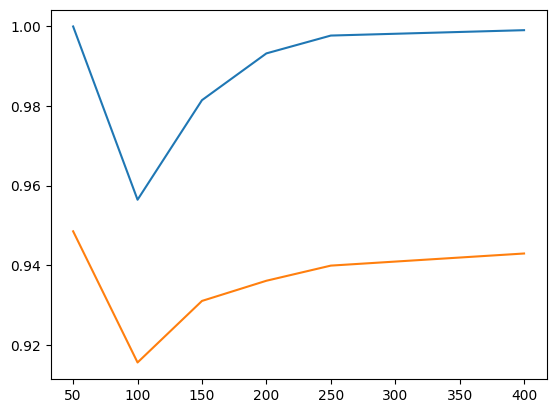

In [ ]:
sns.lineplot(x=[50,100,150,200,250,400],y=train)
sns.lineplot(x=[50,100,150,200,250,400],y=val)

In [ ]:
learning_rate=[0.2,0.4,0.76,1.1,5,10]
train=[]
val=[]
for lt in learning_rate:
  model=GradientBoostingClassifier(n_estimators=40,learning_rate=lt)
  model.fit(X_train,Y_train)
  train.append(model.score(X_train,Y_train))
  val.append(model.score(X_test,Y_test))

<Axes: >

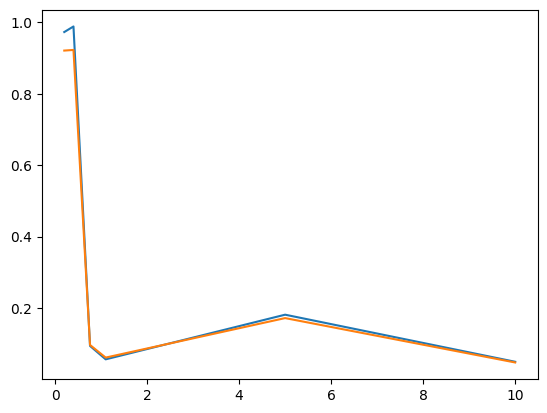

In [ ]:
sns.lineplot(x=learning_rate,y=train)
sns.lineplot(x=learning_rate,y=val)

In [ ]:
val

[0.9208724321582551,
 0.9226477301547046,
 0.09662693380674613,
 0.06137458787725082,
 0.17195029165609943,
 0.047679431904641134]

In [ ]:
#learning rate should be 0.1
train=[]
val=[]
max_depth=[2,4,6,10,20,50]
for dpt in max_depth:
  model=GradientBoostingClassifier(max_depth=dpt)
  model.fit(X_train,Y_train)
  train.append(model.score(X_train,Y_train))
  val.append(model.score(X_test,Y_test))

<Axes: >

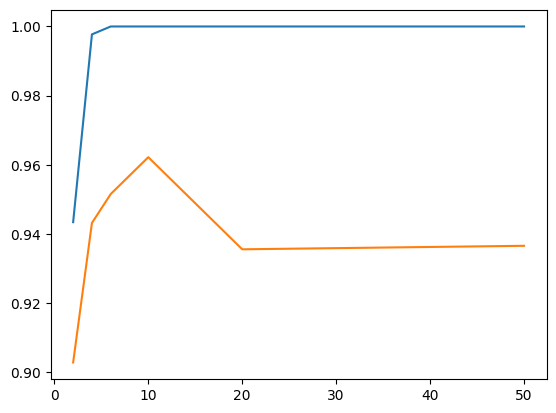

In [ ]:
sns.lineplot(x=max_depth,y=train)
sns.lineplot(x=max_depth,y=val)

In [ ]:
val

[0.9028658381942684,
 0.9431904641136191,
 0.9515597260968806,
 0.9622115140755769,
 0.9355820441288359,
 0.936596500126807]

In [ ]:
model=GradientBoostingClassifier(n_estimators=250,learning_rate=0.1,max_depth=10,verbose=1,random_state=34)
model.fit(X_train,Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3615           10.94m
         2           1.0466           11.24m
         3           0.8334           10.58m
         4           0.6738           10.21m
         5           0.5505            9.98m
         6           0.4531            9.86m
         7           0.3745           10.17m
         8           0.3102           10.02m
         9           0.2577            9.87m
        10           0.2147            9.75m
        20           0.0376            9.31m
        30           0.0071            8.89m
        40           0.0015            8.46m
        50           0.0004            8.04m
        60           0.0001            7.61m
        70           0.0000            7.17m
        80           0.0000            6.70m
        90           0.0000            6.25m
       100           0.0000            5.76m
       200           0.0000            1.15m


GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=34,
                           verbose=1)

In [ ]:
print(f'Training accuracy:{model.score(X_train,Y_train)}\nTesting accuracy{model.score(X_test,Y_test)}')

Training accuracy:1.0
Testing accuracy0.966522952066954
